In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
pls = pd.read_csv('placement.csv')
pls

,cgpa,package
0,7.85,9.72
1,9.12,7.89
2,6.54,5.14
3,8.99,15.30
4,7.01,6.62
...,...,...
96,9.07,19.40
97,6.92,6.36
98,7.81,9.61
99,8.38,13.62


<Axes: xlabel='cgpa', ylabel='package'>

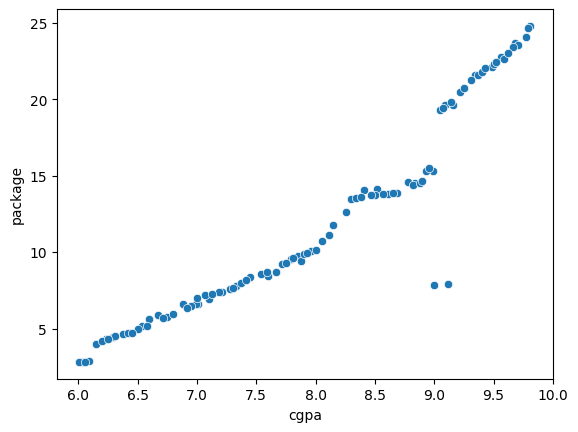

In [27]:
sns.scatterplot(x='cgpa', y='package', data=pls)

In [28]:
x = pls.iloc[:,0:1]
y = pls.iloc[:,-1]

In [29]:
x

,cgpa
0,7.85
1,9.12
2,6.54
3,8.99
4,7.01
...,...
96,9.07
97,6.92
98,7.81
99,8.38


In [31]:
y

0       9.72
1       7.89
2       5.14
3      15.30
4       6.62
       ...  
96     19.40
97      6.36
98      9.61
99     13.62
100    22.46
Name: package, Length: 101, dtype: float64

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 41)

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
X_test

,cgpa
90,7.93
68,9.66
6,6.23
62,7.37
0,7.85
40,9.37
49,6.95
94,7.30
60,9.77
63,8.69


In [12]:
y_test

90     9.96
68    23.40
6      4.29
62     7.95
0      9.72
40    21.59
49     6.46
94     7.68
60    24.09
63    13.89
69     4.72
32    10.05
27    13.81
25     2.82
48    19.64
2      5.14
33     4.98
97     6.36
37     7.18
16     8.36
79    13.73
Name: package, dtype: float64

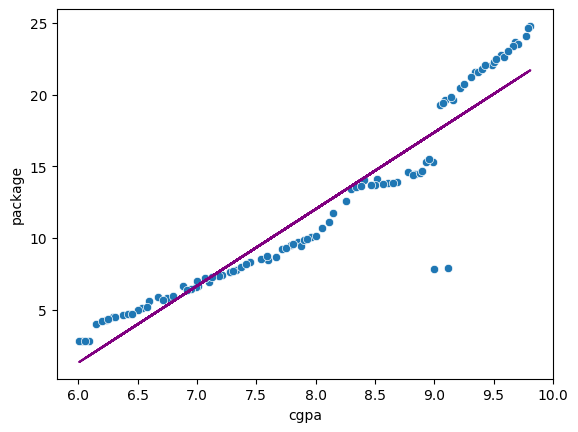

In [36]:
sns.scatterplot(x='cgpa', y='package', data=pls)
plt.plot(X_train,lr.predict(X_train),color='purple')

In [14]:
m = lr.coef_
c = lr.intercept_
print('value of m is:',m)
print('value of c is:',c)

value of m is: [5.35231358]
value of c is: -30.807027789725762


In [15]:
# y = mx + c

y_pred = lr.predict(X_test)
y_pred

array([11.6368189 , 20.89632139,  2.53788581,  8.6395233 , 11.20863381,
       19.34415046,  6.39155159,  8.26486134, 21.48507589, 15.70457722,
        3.7153948 , 11.79738831, 15.27639213,  1.4674231 , 17.84550265,
        4.19710302,  3.98301048,  6.23098218,  7.03382922,  9.06770838,
       14.68763764])

In [16]:
print(m * 7.93 + c)
print(m * 9.66 + c)

[11.6368189]
[20.89632139]


In [17]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_squared_log_error
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Score:',r2_score(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_log_error(y_test,y_pred)))
print('Adjusted r2 score',1-(1-r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-x.shape[1]-1))

MAE: 1.2702528778448223
MSE: 2.13866558563387
RMSE: 1.4624177192696586
R2 Score: 0.9467826372440624
RMSE: 0.16830236562704057
Adjusted r2 score 0.9439817234148026


In [18]:
# Create new DataFrame and add IQ column
new_df2 = pls.copy()  # Replace pls with df (or provide pls if different)
n_rows = len(new_df2)  # Dynamically get number of rows
new_df2['iq'] = new_df2['package'] + np.round(np.random.randint(-12, 12, n_rows) / 10, 2)  # Round noise to 2 decimals
new_df2 = new_df2[['cgpa', 'iq', 'package']]  # Reorder columns

# Verify IQ column (check rounding)
print("Sample of new_df2 with IQ column:")
print(new_df2.head())

Sample of new_df2 with IQ column:
   cgpa     iq  package
0  7.85   9.22     9.72
1  9.12   7.39     7.89
2  6.54   5.14     5.14
3  8.99  15.80    15.30
4  7.01   6.42     6.62


In [19]:
new_df2

,cgpa,iq,package
0,7.85,9.22,9.72
1,9.12,7.39,7.89
2,6.54,5.14,5.14
3,8.99,15.80,15.30
4,7.01,6.42,6.62
...,...,...,...
96,9.07,20.20,19.40
97,6.92,6.76,6.36
98,7.81,10.41,9.61
99,8.38,13.22,13.62


In [20]:
X2 = new_df2.iloc[:,0:2]
y2 = new_df2.iloc[:,-1]

In [21]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state=2)

In [22]:
lr = LinearRegression()
lr.fit(X2_train,y2_train)
y2_pred = lr.predict(X2_test)

In [23]:
print('Before random iq')
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score",r2_score(y_test,y_pred))
print('Adjusted r2 score',1-(1-r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-x.shape[1]-1))
print('--'*70)
print('After random iq')
print("MAE",mean_absolute_error(y2_test,y2_pred))
print("MSE",mean_squared_error(y2_test,y2_pred))
print("RMSE",np.sqrt(mean_squared_error(y2_test,y2_pred)))
print("R2 Score",r2_score(y2_test,y2_pred))
print('Adjusted r2 score',1-(1-r2_score(y2_test,y2_pred))*(len(y2_test)-1)/(len(y2_test)-X2.shape[1]-1))

Before random iq
MAE 1.2702528778448223
MSE 2.13866558563387
RMSE 1.4624177192696586
R2 Score 0.9467826372440624
Adjusted r2 score 0.9439817234148026
--------------------------------------------------------------------------------------------------------------------------------------------
After random iq
MAE 0.46871912686858364
MSE 0.32064267895294446
RMSE 0.566253193326929
R2 Score 0.9936237653246432
Adjusted r2 score 0.9929152948051592
